# Multiclass RF classifier and clustering of sigma factors

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import shap
import seaborn as sns
from sklearn.cluster import DBSCAN

from umap import UMAP

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Importing dataset and making train sets

In [4]:
df = pd.read_csv("one_vs_rest_features.csv" )
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,71,72,73,74,75,76,77,78,79,labels
0,0,-1.45,-1.00,-1.45,-1.84,-1.45,-1.30,-2.27,-1.45,-1.00,...,-1.45,-2.24,-1.30,-1.00,-1.00,-1.30,-2.27,-1.84,-1.45,5
1,1,-1.30,-2.27,-1.45,-1.00,-1.30,-1.30,-1.30,-1.30,-1.00,...,-1.30,-2.27,-1.84,-1.45,-1.30,-1.84,-1.30,-0.88,-1.00,5
2,2,-1.84,-2.24,-2.27,-2.24,-1.30,-1.45,-1.84,-1.28,-1.00,...,-2.27,-1.84,-1.45,-0.88,-1.00,-1.44,-2.27,-1.84,-2.24,5
3,3,-1.45,-1.00,-1.30,-1.30,-1.30,-2.27,-1.28,-1.44,-1.84,...,-2.24,-1.84,-1.44,-1.28,-1.28,-1.44,-1.30,-1.45,-1.84,5
4,4,-0.58,-1.30,-1.30,-0.88,-1.44,-1.44,-1.28,-1.84,-1.28,...,-1.00,-0.88,-1.28,-1.45,-1.45,-1.84,-2.24,-1.30,-1.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,2946,-1.28,-1.28,-2.24,-2.27,-1.28,-1.44,-1.44,-0.58,-0.88,...,-1.45,-1.28,-1.00,-0.58,-1.00,-1.45,-1.84,-2.24,-1.84,0
2947,2947,-0.88,-1.00,-1.44,-1.30,-1.00,-1.30,-2.27,-1.28,-1.44,...,-1.00,-1.00,-0.88,-1.28,-1.45,-1.00,-1.45,-2.24,-1.30,0
2948,2948,-0.58,-0.88,-1.44,-1.44,-0.58,-1.00,-1.45,-1.45,-0.88,...,-2.27,-1.45,-1.00,-1.30,-1.30,-1.45,-1.28,-0.58,-1.00,0
2949,2949,-1.00,-0.88,-0.58,-1.30,-2.27,-2.24,-1.30,-1.30,-1.44,...,-1.45,-1.45,-1.00,-1.30,-1.84,-2.27,-1.45,-1.00,-1.45,0


In [5]:
# Separate the features and the target
features = df.iloc[:, 1:-1]  # All columns except the last one and the first
target = df.iloc[:, -1]     # The last column

# Apply Min-Max scaling to the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Combine the scaled features with the target column
scaled_df = pd.concat([scaled_features_df, target], axis=1)
df = scaled_df

In [6]:
# Features set
X = df.iloc[:,1:-1]

# Labels set
y = df.iloc[:,-1]

# Create the subsets for training and testing with the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=37)

## Train the ML model

In [8]:
# This cell comes from André's code. It is meant for evaluation a validation of the model only
rf_classifier = RandomForestClassifier(random_state=37)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=37)

In [9]:
# This cell's purpose is to calculate the SHAP values of all data points
full = RandomForestClassifier(random_state=37)
full.fit(X, y)

RandomForestClassifier(random_state=37)

In [10]:
y_pred = rf_classifier.predict(X_test)

## Evaluation of the model

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confussion matrix:")
print(cm)

# calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)

# Calculate Matthews correlation coefitient
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

Accuracy: 0.6785109983079526
Confussion matrix:
[[335   0   0   0   0   1]
 [ 18   0   0   1   0   3]
 [ 25   0   0   0   0   0]
 [ 18   0   0  38   0   3]
 [ 24   0   0   5   3   1]
 [ 85   0   0   6   0  25]]
Precision: 0.5301570157015701
Recall: 0.32458632307039664
F1-Score: 0.33269257884824716
MCC: 0.4306241487417903


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [13]:
# Defining the number (k) of folds to be used in cross-validation
num_folds = 10

# Create an object from the model
modelo = RandomForestClassifier()

# Create a KFold object that divides the dataset in k folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Carry out the coss validation and scoring
scores = cross_val_score(modelo, X, y, cv=kf, scoring='accuracy')  # Substitua 'accuracy' pela métrica desejada

# Print the scores per fold
print(f"Performance scores per fold: {scores}")

# Print summary
print(f"Cross-validation mean: {scores.mean():.2f}")
print(f"Cross-validation deviation: {scores.std():.2f}")

Performance scores per fold: [0.66891892 0.66440678 0.70847458 0.65762712 0.74237288 0.70169492
 0.71186441 0.70169492 0.65762712 0.73220339]
Cross-validation mean: 0.69
Cross-validation deviation: 0.03


## SHAP

In [15]:
# Generate the SHAP values for clustering
explainer = shap.Explainer(full, random_state=37)
shap_values = explainer(X)

In [16]:
shap_values.values.shape # The shap_values object has a multidimentional shape

(2951, 79, 6)

In [17]:
sv0 = shap_values.values[:, :, 0]
sv1 = shap_values.values[:, :, 1]
sv2 = shap_values.values[:, :, 2]
sv3 = shap_values.values[:, :, 3]
sv4 = shap_values.values[:, :, 4]
sv5 = shap_values.values[:, :, 5]

In [18]:
# !!!!!!!!!!
# This cell takes a long time to excecute
# Generate the SHAP values for visualization only
EXPLAINER = shap.Explainer(full.predict, X)
SHAP_VALUES = EXPLAINER(X)
# !!!!!!!!

Permutation explainer: 2952it [11:34,  4.19it/s]                          


In [19]:
sample_ind = 2900  # Subsitute 0 for the index of the desired sample

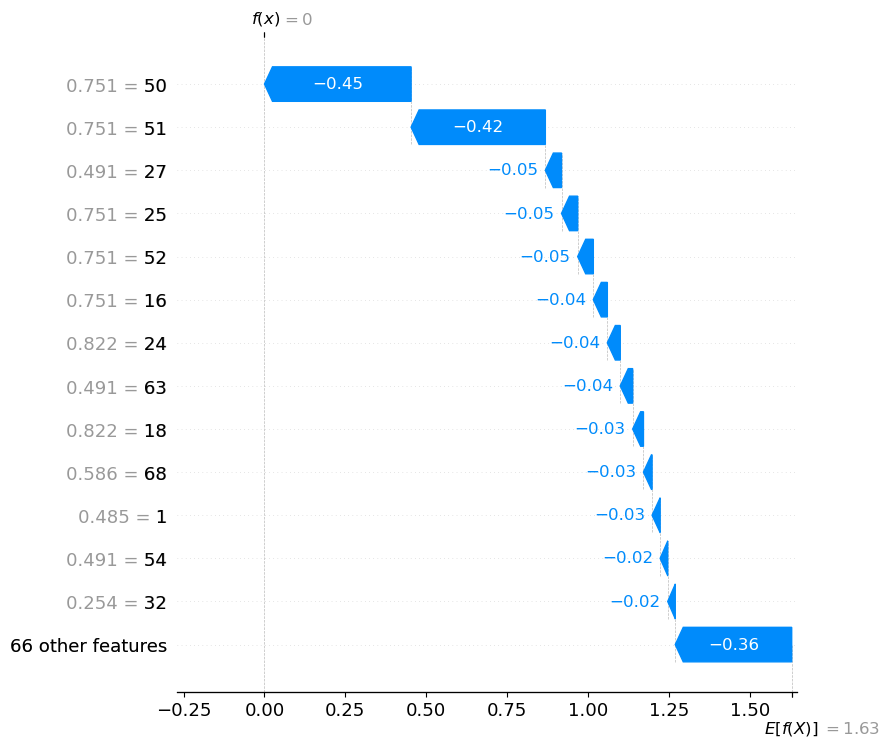

In [20]:
shap.plots.waterfall(shap_values=SHAP_VALUES[sample_ind], max_display=14)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


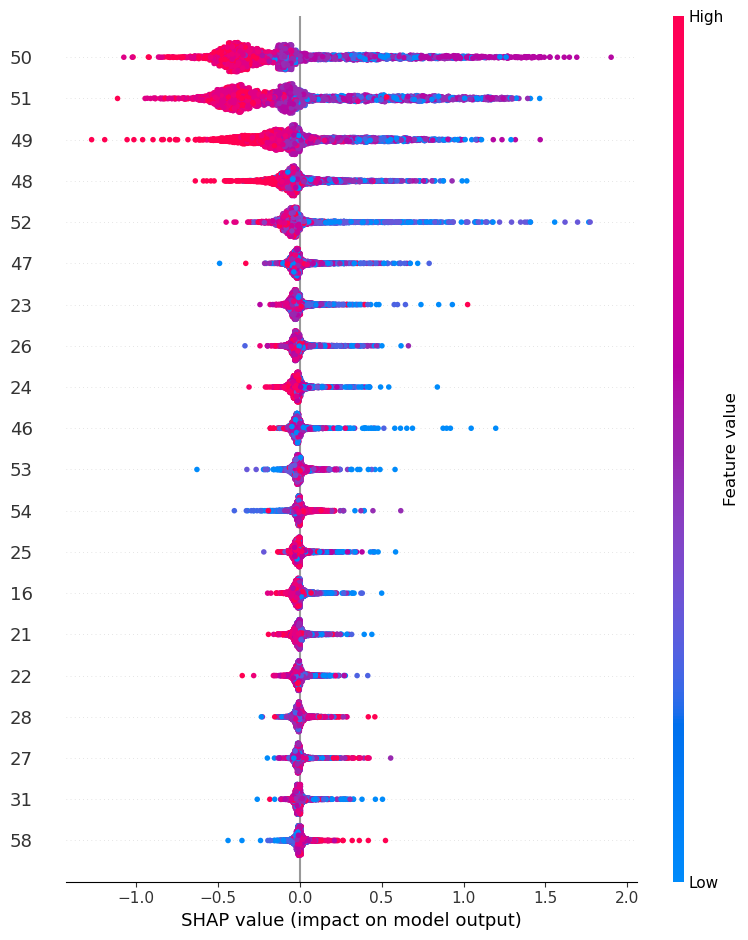

In [21]:
shap.summary_plot(SHAP_VALUES, X)

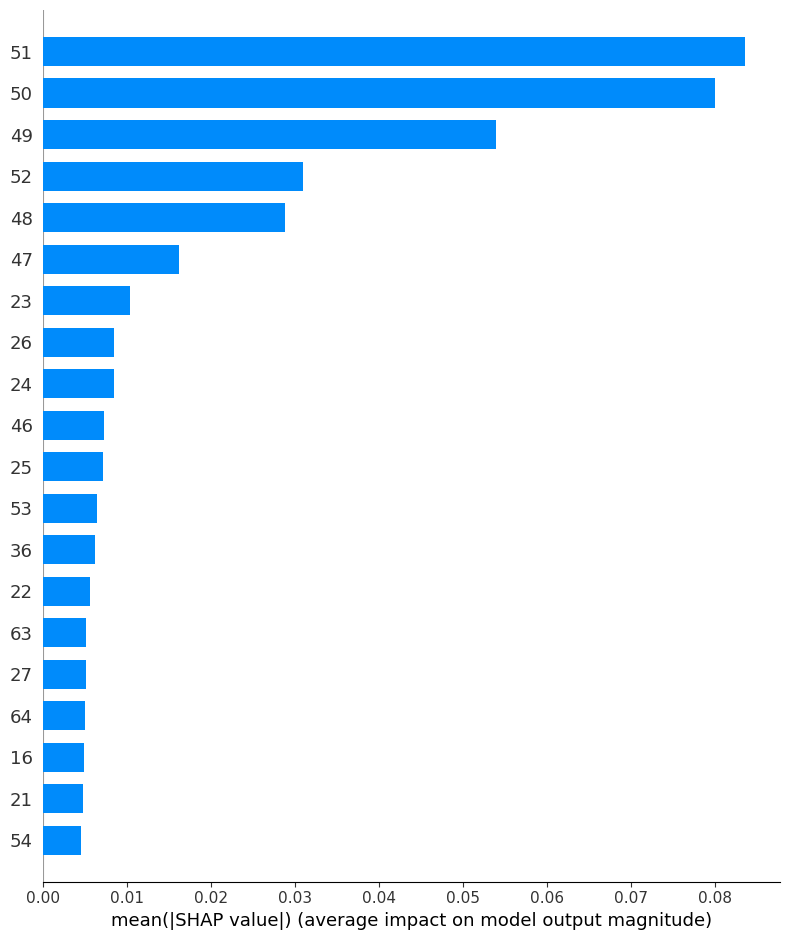

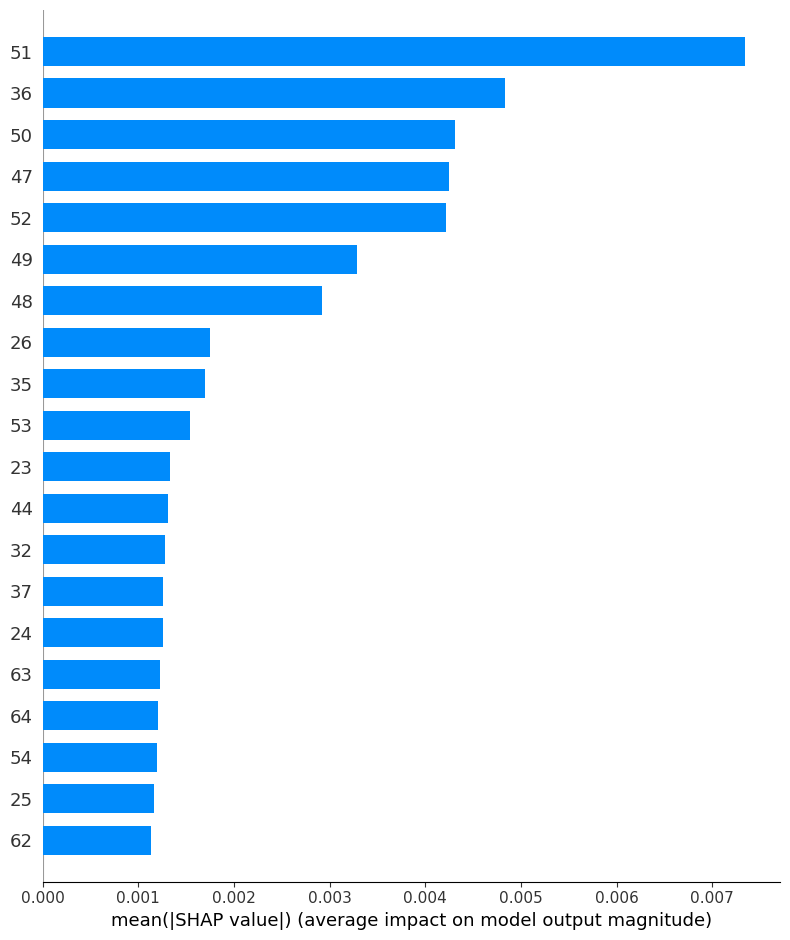

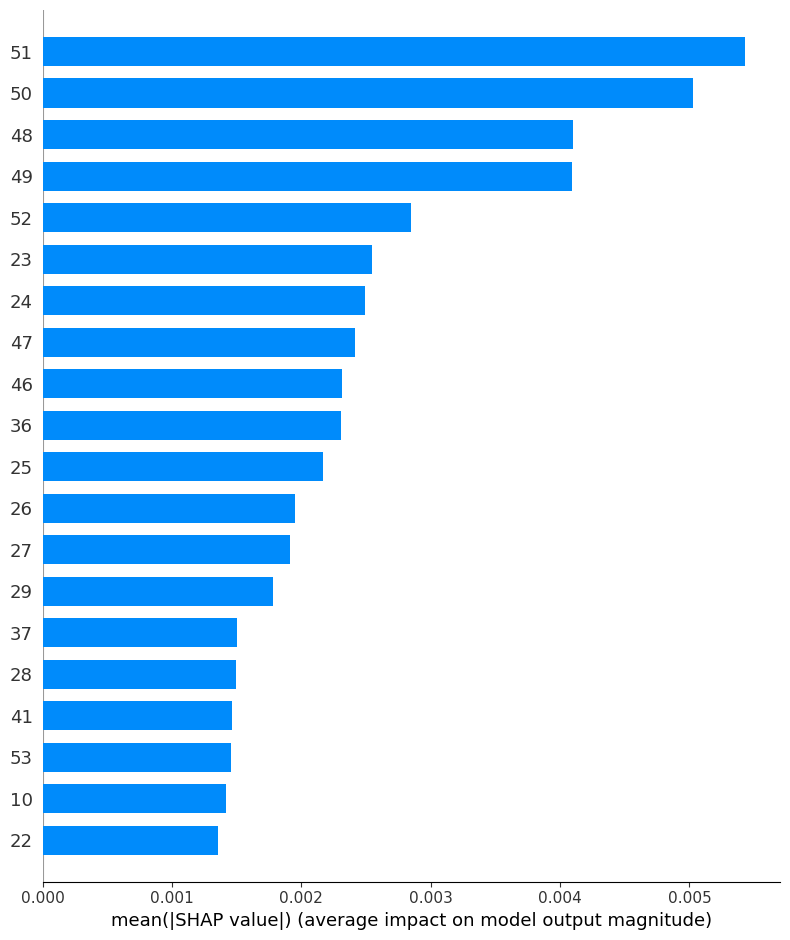

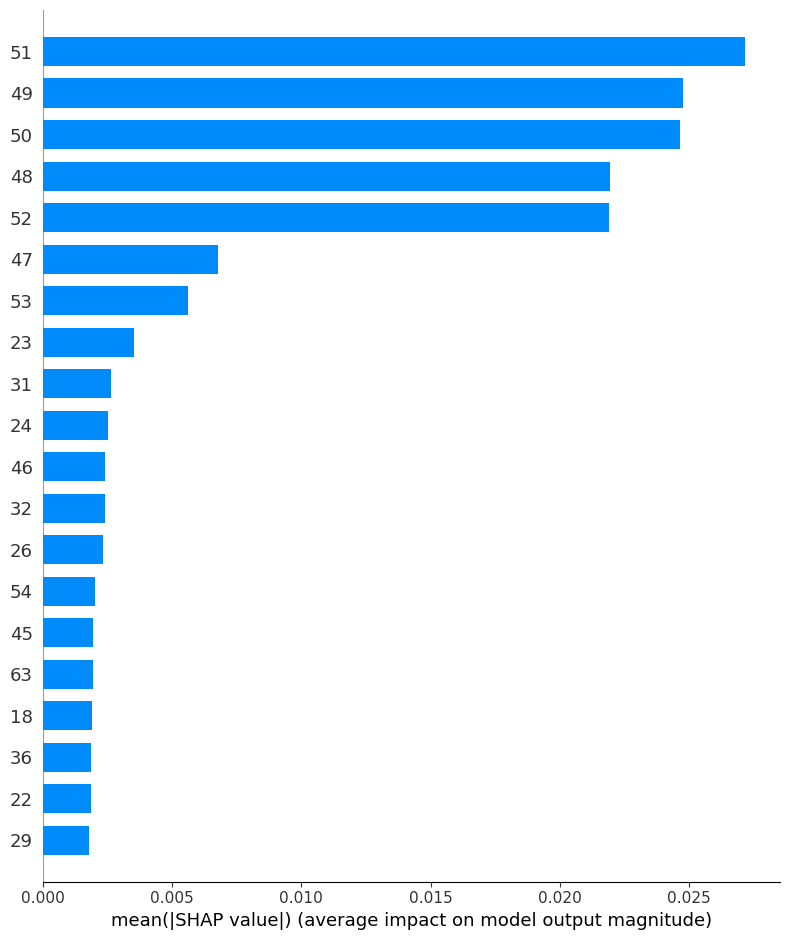

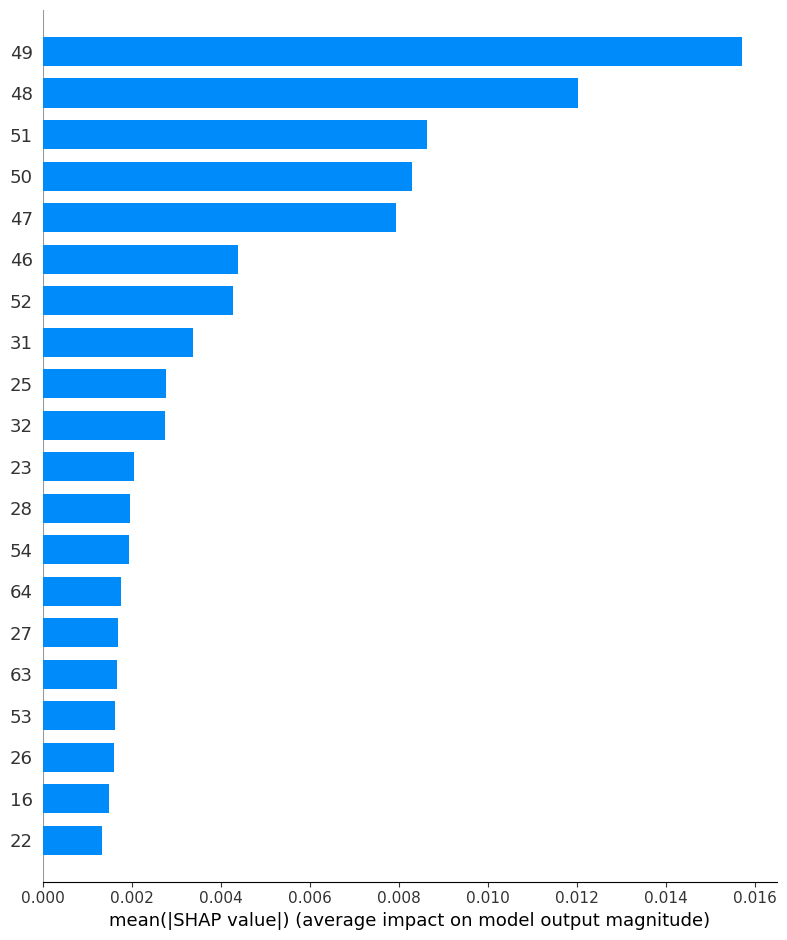

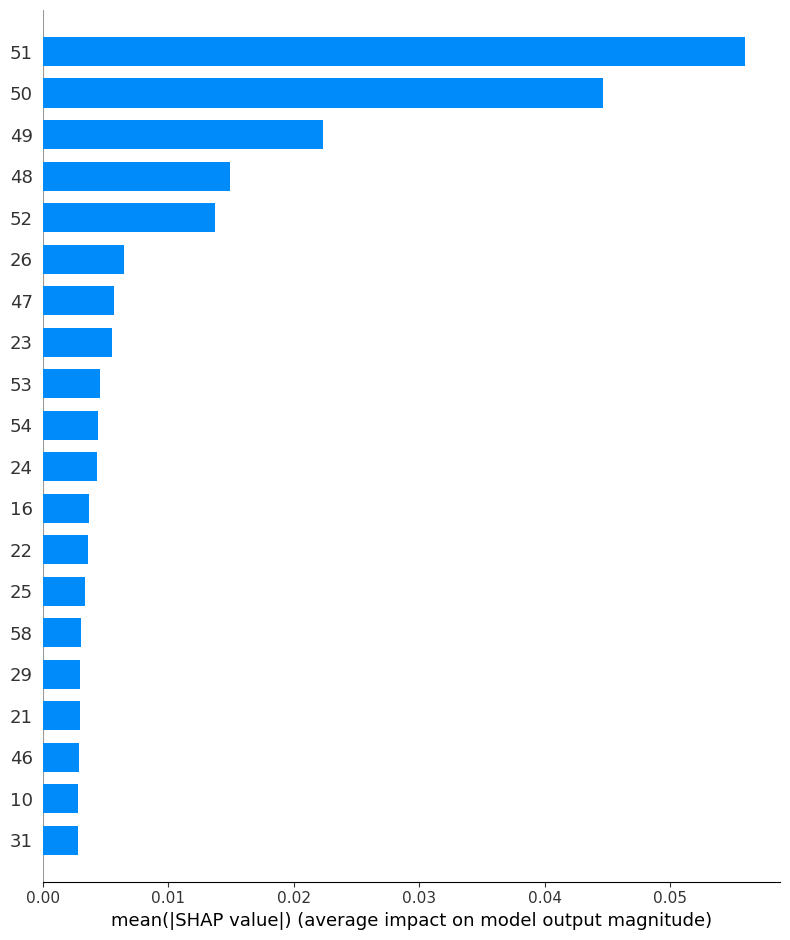

In [41]:
shap.summary_plot(sv0, X, plot_type="bar")
shap.summary_plot(sv1, X, plot_type="bar")
shap.summary_plot(sv2, X, plot_type="bar")
shap.summary_plot(sv3, X, plot_type="bar")
shap.summary_plot(sv4, X, plot_type="bar")
shap.summary_plot(sv5, X, plot_type="bar")

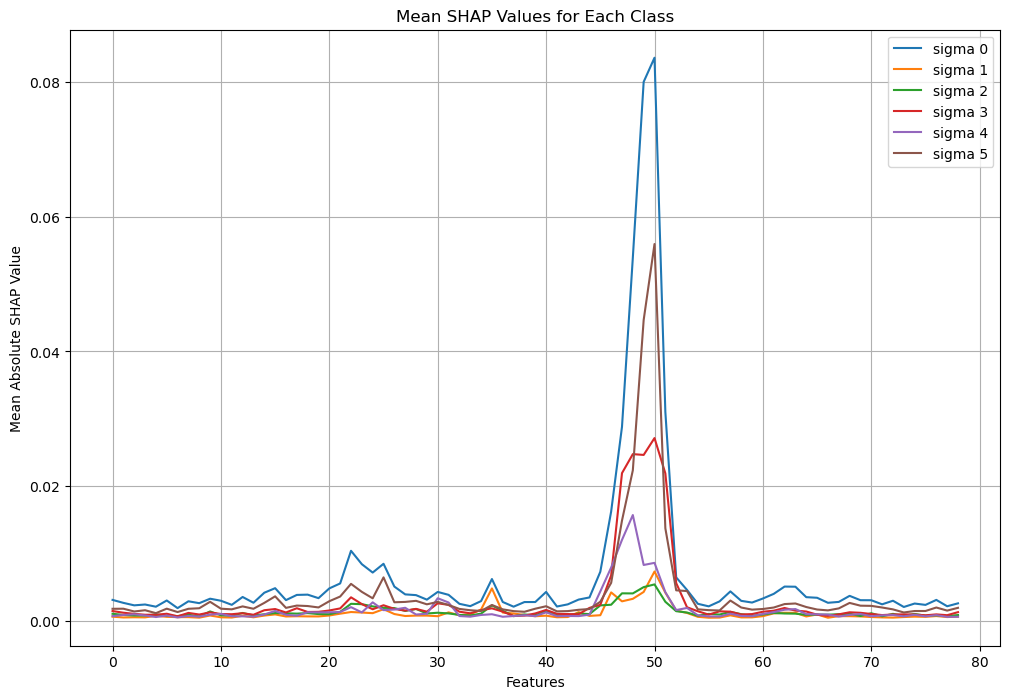

In [59]:
# Initialize a dictionary to store mean SHAP values for each class
mean_shap_values = {i: [] for i in range(0,6)}

# Calculate mean absolute SHAP values for each feature and each class
for i in range(0,6):
    mean_shap_values[i] = np.mean(np.abs(shap_values[:, :, i].values), axis=0)

# Create a line plot for comparison
plt.figure(figsize=(12, 8))
for i in range(0,6):
    plt.plot(range(0,79), mean_shap_values[i], marker='', label= f"sigma {i}")

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Mean Absolute SHAP Value')
plt.title('Mean SHAP Values for Each Class')
plt.legend()
plt.grid(True)
plt.show()

## Dimensionality reduction

In [67]:
# for class colours in scatter plots
c = ["#B0ABAA"] * len(y)  # grey for negatives
for i in range(len(y)):
    if y[i] == 0:
        c[i] = "#3EA6E9" # blue for positives

In [69]:
y = df.iloc[:,-1]

c2 = ["#AFAFAF"] * len(y)  # gray

for i, label in enumerate(y):  # Use enumerate to get both index i and label
    if label == 0:
        c2[i] = "#3EA6E9"  # blue
    elif label == 1:
        c2[i] = "#855107"  # brown
    elif label == 2:
        c2[i] = "#F4F407"  # yellow
    elif label == 3:
        c2[i] = "#F17947"  # orangey
    elif label == 4:
        c2[i] = "#55F147"  # green
    elif label == 5:
        c2[i] = "#E862E6"  # pink

In [71]:
# compute 2D embedding of raw variable values using UMAP
X_2d = UMAP(
    n_components=2,
    n_neighbors=10,
    min_dist=0,
    random_state=37,
).fit_transform(X)

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


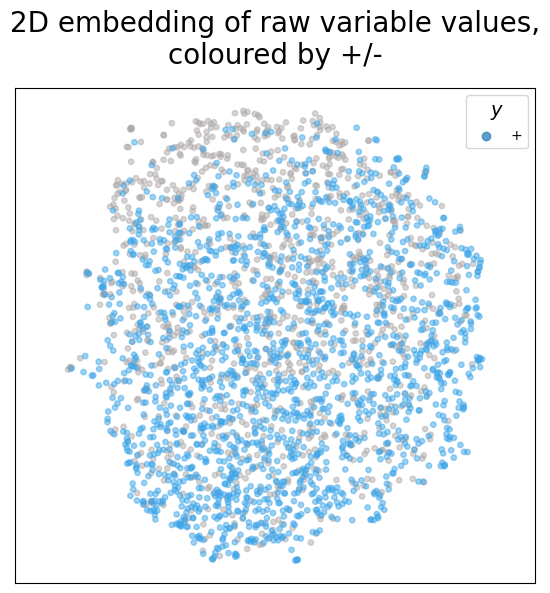

In [110]:
y = df.iloc[:,-1]

fig, ax = plt.subplots(figsize=(5.5, 6))
sns.regplot(
    x="A",
    y="B",
    data=pd.DataFrame(X_2d, columns=["A", "B"]),
    fit_reg=False,
    ax=ax,
    scatter_kws={"alpha": 0.5, "s": 15, "color": c},
)

# equalise axes and hacky solution for legend
ax.axis("equal")
x, y = ax.get_xlim(), ax.get_ylim()
ax.scatter([99], [99], label="+", alpha=0.7)

ax.legend(title="$y$", title_fontsize=14)
ax.set_xlim(x)
ax.set_ylim(y)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])

fig.suptitle(
    "2D embedding of raw variable values,\ncoloured by +/-",
    fontsize=20,
)
fig.tight_layout()

In [79]:
# compute 2D embedding of SHAP variable values using UMAP
sv_2d0 = UMAP(
    n_components=2,
    n_neighbors=10,
    min_dist=0,
    random_state=37,
).fit_transform(sv0)

sv_2d1 = UMAP(
    n_components=2,
    n_neighbors=10,
    min_dist=0,
    random_state=37,
).fit_transform(sv1)

sv_2d2 = UMAP(
    n_components=2,
    n_neighbors=10,
    min_dist=0,
    random_state=37,
).fit_transform(sv2)

sv_2d3 = UMAP(
    n_components=2,
    n_neighbors=10,
    min_dist=0,
    random_state=37,
).fit_transform(sv3)

sv_2d4 = UMAP(
    n_components=2,
    n_neighbors=10,
    min_dist=0,
    random_state=37,
).fit_transform(sv4)

sv_2d5 = UMAP(
    n_components=2,
    n_neighbors=10,
    min_dist=0,
    random_state=37,
).fit_transform(sv5)

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


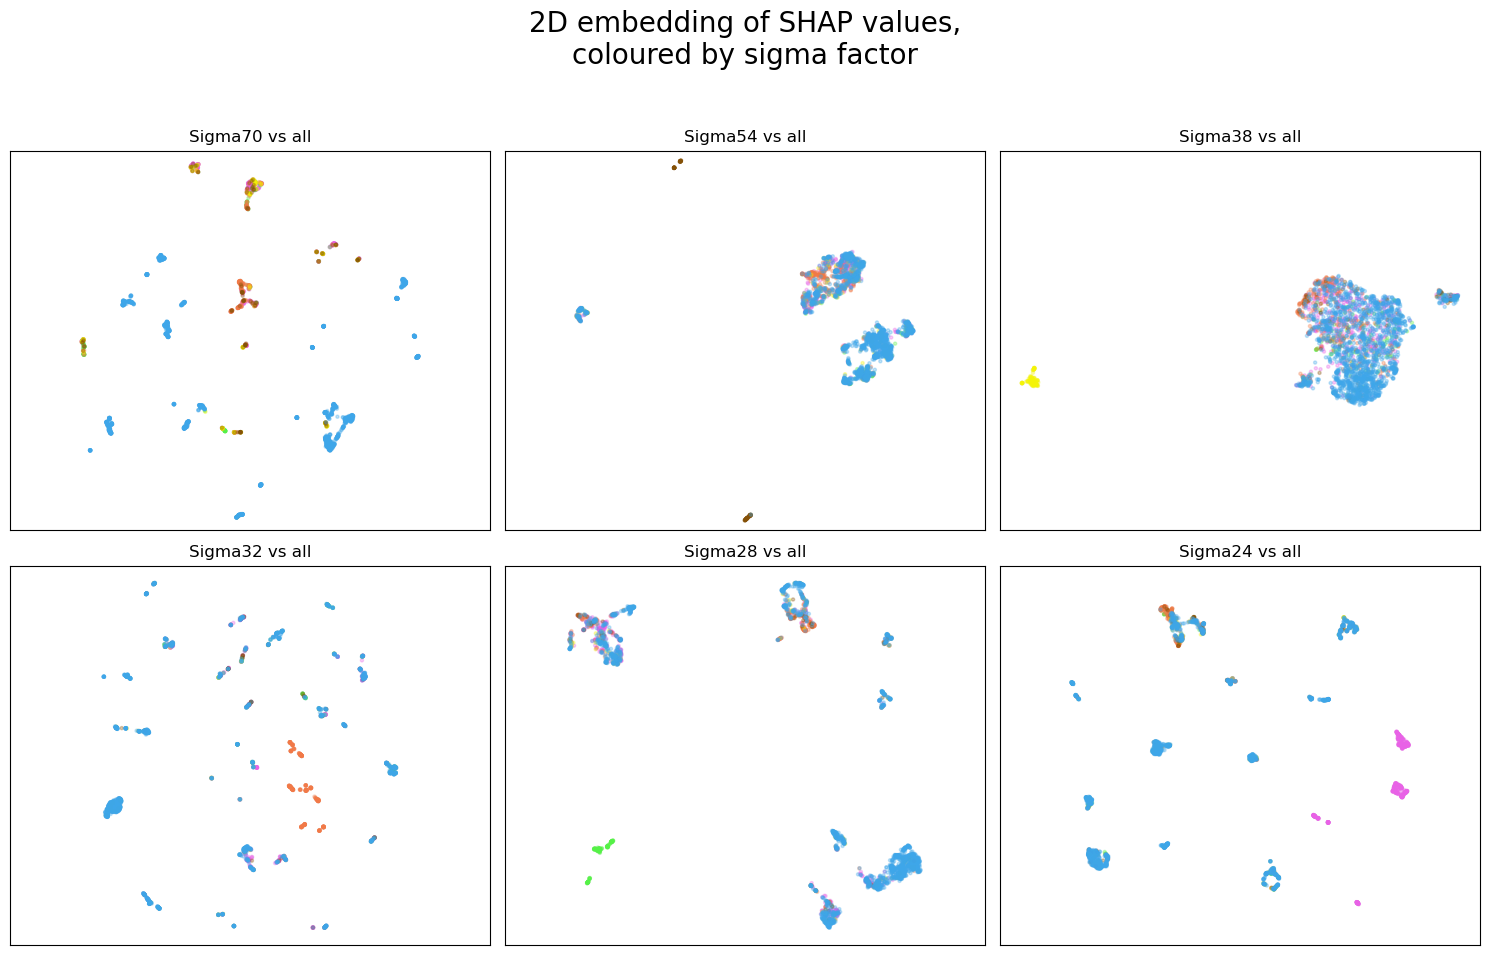

In [100]:
datasets = [sv_2d0, sv_2d1, sv_2d2, sv_2d3, sv_2d4, sv_2d5]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axes = axes.flatten()
titles = [
    "Sigma70 vs all",
    "Sigma54 vs all",
    "Sigma38 vs all",
    "Sigma32 vs all",
    "Sigma28 vs all",
    "Sigma24 vs all"
]

for i, (data, ax) in enumerate(zip(datasets, axes)):
    df = pd.DataFrame(data, columns=["A", "B"])
    sns.regplot(
        x="A",
        y="B",
        data=df,
        fit_reg=False,
        ax=ax,
        scatter_kws={"alpha": 0.5, "s": 5, "color": c2, "alpha": 0.3},
    )
    # Equalize axes and add hacky solution for legend
    ax.axis("equal")
    x, y = ax.get_xlim(), ax.get_ylim()
   
    ax.set_xlim(x)
    ax.set_ylim(y)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(titles[i])

fig.suptitle("2D embedding of SHAP values,\ncoloured by sigma factor", fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig("one_vsall_analysis.png", dpi=600)
plt.show()
